# ISE537 Final Project

## Boyue Wang 2090953408

In [198]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from pandas_datareader.data import DataReader

from datetime import datetime
import yfinance as yf

from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from statsmodels.tsa.stattools import arma_order_select_ic

from statsmodels.tsa.stattools import adfuller

from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.arima_model import ARIMA

from sklearn.metrics import mean_squared_error

import scipy.stats as stats
import statsmodels.api as sm

# ARIMA Model

## Pepsi

In [303]:
start = '2019-01-01'
end = '2021-10-30'
PEP = yf.download('PEP', start , end)['Close']

[*********************100%***********************]  1 of 1 completed


In [326]:
len(PEP)

714

In [304]:
PEP_diff = PEP.diff().dropna()
PEP_rtn = np.log(PEP).diff().dropna()

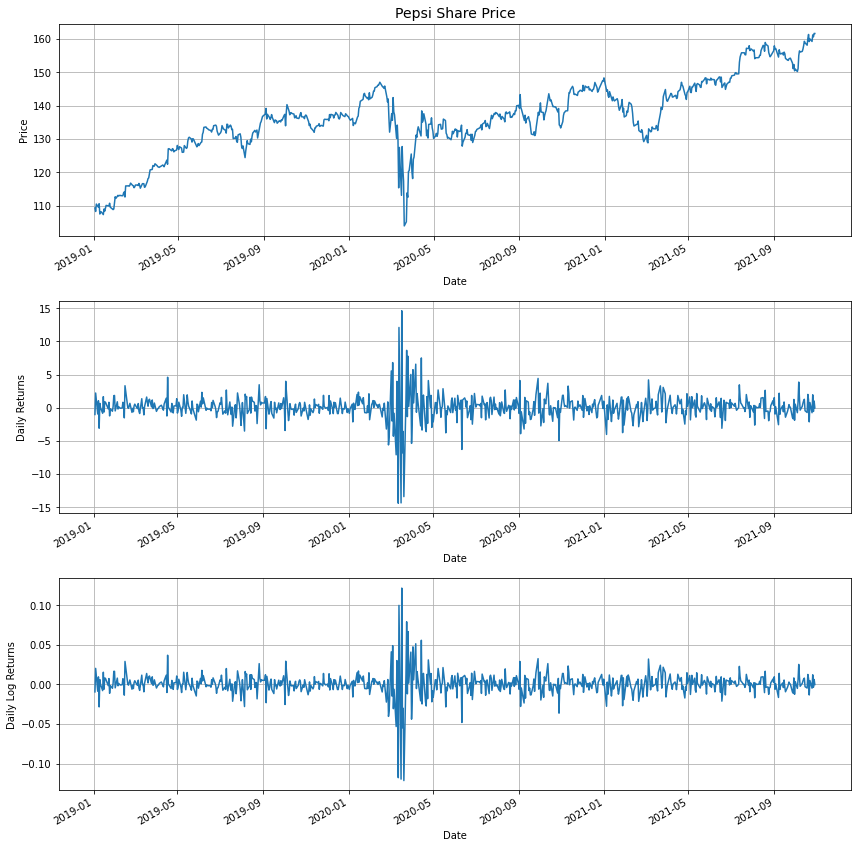

In [305]:
plt.figure(figsize=(12,12))

plt.subplot(3,1, 1)
PEP.plot()
plt.grid()
plt.ylabel("Price")
plt.title("Pepsi Share Price", fontsize = 14)
plt.subplot(3,1, 2)
PEP_diff.plot()
plt.grid()
plt.tight_layout(pad=1.5)
plt.ylabel("Daily Returns")
plt.subplot(3,1, 3)
PEP_rtn.plot()
plt.grid()
plt.tight_layout(pad=1.5)
plt.ylabel("Daily Log Returns")
plt.savefig("PEP_stationary")

In [306]:
result = adfuller(PEP)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.961066
p-value: 0.303901
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [307]:
result = adfuller(PEP_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.911486
p-value: 0.000000
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [308]:
result = adfuller(PEP_rtn)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -7.975988
p-value: 0.000000
	1%: -3.440
	5%: -2.866
	10%: -2.569


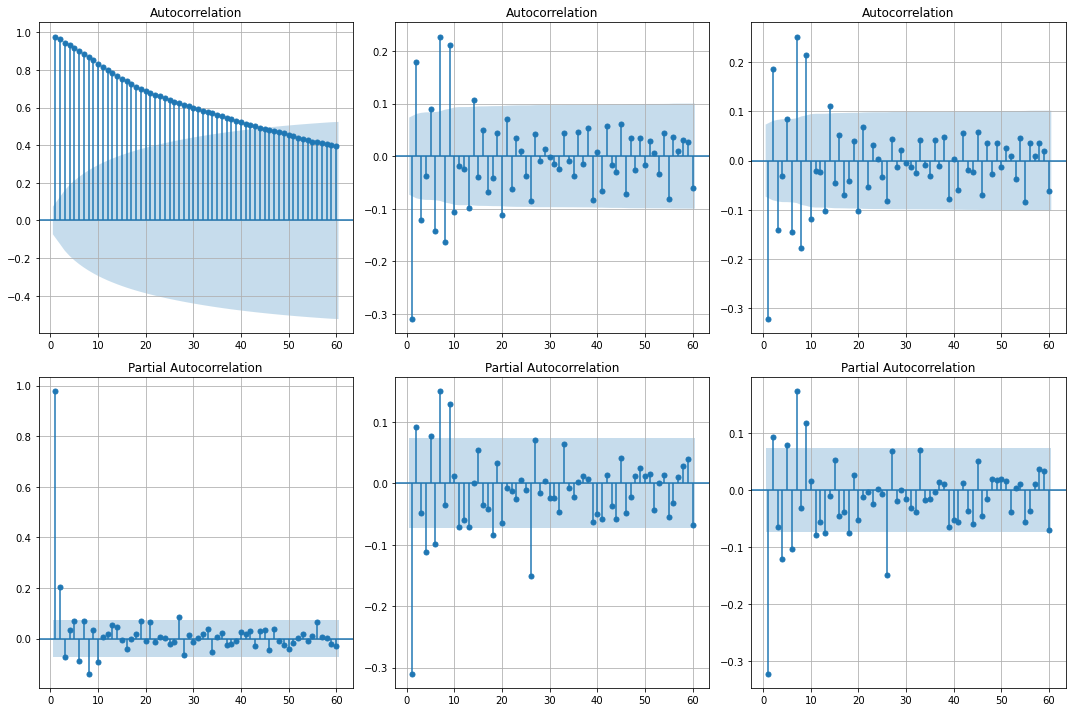

In [309]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(15,10))

fig1 = plot_acf(PEP,lags=60,zero=False, ax = ax1,use_vlines = True)
ax1.grid()
    
fig2 = plot_acf(PEP_diff,lags=60,zero=False, ax = ax2,use_vlines = True)
ax2.grid()
    
fig3 = plot_acf(PEP_rtn,lags=60,zero=False, ax = ax3,use_vlines = True)
ax3.grid()
    
fig4 = plot_pacf(PEP,lags=60,zero=False, ax = ax4,use_vlines = True)
ax4.grid()
    
fig5 = plot_pacf(PEP_diff,lags=60,zero=False, ax = ax5,use_vlines = True)
ax5.grid()
    
fig6 = plot_pacf(PEP_rtn,lags=60,zero=False, ax = ax6,use_vlines = True)
ax6.grid()
    
plt.tight_layout()

## Choose P and Q

In [310]:
def searchARMA(data, exog, max_p, max_q):
 
    aic = np.zeros((max_p,max_q))
    bic = np.zeros((max_p,max_q))
    for i in range(max_p):
        for j in range(max_q):
            try:
                if(len(exog) == len(data)):
                    model = ARMA(data,(i,j), exog = exog) 
                else:
                     model = ARMA(data,(i,j)) 
                res = model.fit(trend='nc')
                aic[i,j] = res.aic
                bic[i,j] = res.bic
                print('p:',i,' q:', j,' aic:', aic[i,j], ' bic:', bic[i,j])
            except:
                continue

In [311]:
PEP_p = yf.download('PEP', start , end)
PEP_pr = np.array(PEP_p.reset_index()['Close'])
PEP_pr_diff = PEP_pr[1:] - PEP_pr[:-1]

[*********************100%***********************]  1 of 1 completed


In [312]:
n=len(PEP_pr_diff)
exog = np.ones(n)
searchARMA(PEP_pr_diff, exog, max_p=8, max_q =8)
## choose p and q equal 3 1 or  3 3 or 4 6 or 4 5  or 4 4 or 4 1

p: 0  q: 0  aic: 2996.474583231645  bic: 3005.6135460724736
p: 0  q: 1  aic: 2939.799981613137  bic: 2953.5084258743796
p: 0  q: 2  aic: 2931.177384004528  bic: 2949.455309686185
p: 0  q: 3  aic: 2917.3461360516267  bic: 2940.193543153698
p: 0  q: 4  aic: 2918.8822822601524  bic: 2946.299170782638
p: 0  q: 5  aic: 2920.8674712547136  bic: 2952.8538411976137
p: 0  q: 6  aic: 2922.8117638500134  bic: 2959.367615213328
p: 0  q: 7  aic: 2913.024423929379  bic: 2954.1497567131073
p: 1  q: 0  aic: 2926.690625357409  bic: 2940.3990696186515
p: 1  q: 1  aic: 2922.7571199137747  bic: 2941.0350455954317
p: 1  q: 2  aic: 2923.7039121393054  bic: 2946.551319241377
p: 1  q: 3  aic: 2918.927145214361  bic: 2946.344033736847
p: 1  q: 4  aic: 2902.0174294868316  bic: 2934.0037994297318
p: 1  q: 7  aic: 2892.6650370473035  bic: 2938.3598512514463
p: 2  q: 0  aic: 2922.6880350770725  bic: 2940.9659607587296
p: 2  q: 1  aic: 2924.245267354382  bic: 2947.0926744564536
p: 2  q: 2  aic: 2890.9886570047092  

In [313]:
a = [[3,1],[3,3],[4,1],[4,4],[4,5],[4,6]]

In [315]:
n = int(len(PEP)*0.8)
PEP_train = PEP[:n]
PEP_test = PEP[n:]

In [316]:
for i in a:
    p = i[0]
    q = i[1]
    PEP_model = ARIMA(PEP_train, order = (p,1,q))
    PEP_result = PEP_model.fit()
    step = len(PEP_test)
    PEP_fc, PEP_se, PEP_conf = PEP_result.forecast(step)
    PEP_fc = pd.Series(PEP_fc, index=PEP_test[:step].index)
    PEP_rmse = np.mean((PEP_fc - PEP_test)**2)**.5
    print(i,PEP_rmse)

[3, 1] 5.944299778705606
[3, 3] 6.0328265578150555
[4, 1] 5.911090960517552
[4, 4] 6.050626448810515
[4, 5] 5.968132325570422
[4, 6] 5.959552602165999


In [317]:
PEP_model = ARIMA(PEP_train, order = (4,1,1))
PEP_result = PEP_model.fit()

In [318]:
PEP_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  570
Model:                 ARIMA(4, 1, 1)   Log Likelihood               -1190.011
Method:                       css-mle   S.D. of innovations              1.951
Date:                Sun, 12 Dec 2021   AIC                           2394.023
Time:                        16:00:59   BIC                           2424.442
Sample:                             1   HQIC                          2405.892
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0587      0.063      0.935      0.350      -0.064       0.182
ar.L1.D.Close    -1.1204      0.087    -12.923      0.000      -1.290      -0.951
ar.L2.D.Close    -0.1494      0.067     -2.222      0.026      -0.281      -0.018
ar.L3.D.Close    -0.0113      0.064     -0.176      0.861      -0.137       0.114
ar.L4.D.Close    -0.1543      0.048     -3.191      0.001      -0.249      -0.060
ma.L1.D.Close     0.8704      0.082     10.648      0.000       0.710       1.031
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.1383           -0.3527j            1.1917           -0.4522
AR.2           -1.1383           +0.3527j            1.1917            0.4522
AR.3            1.1018           -1.8306j            2.1366           -0.1638
AR.4            1.1018           +1.8306j            2.1366            0.1638
MA.1           -1.1490           +0.0000j            1.1490            0.5000
-----------------------------------------------------------------------------
"""

In [319]:
def plot_diagnosticsTight3(data):

    fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize=(10,6))
    
    ax1.hist(data, bins =40,color='m', density = True)  
    mu = data.mean()
    sigma = data.std()
    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 2419)
    ax1.plot(x, stats.norm.pdf(x, mu, sigma), linewidth= 5)
    ax1.grid()
    ax1.set_title("Hist Resid")
    
    ax2.plot(data)
    ax2.grid()
    ax2.set_title("Resid")
    
    fig = plot_acf(data,lags=40,zero=False, ax = ax3,use_vlines = True)
    ax3.grid()
    
   
    
    
    fig = sm.qqplot(data, line='q', ax = ax4)
    ax4.grid()
    
   
    plt.tight_layout()


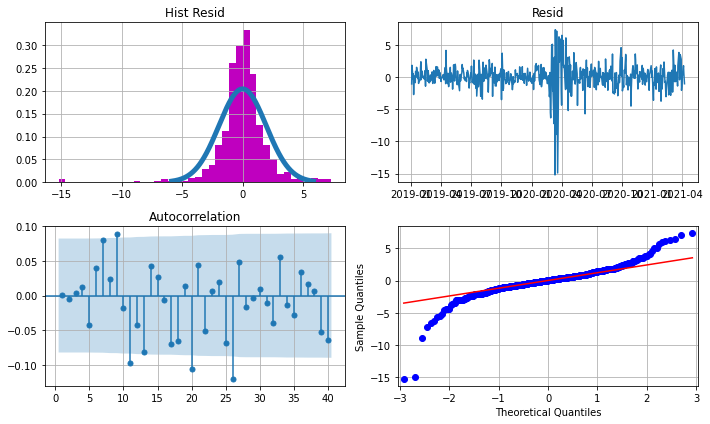

In [320]:
resid = PEP_result.resid
plot_diagnosticsTight3(resid)

In [322]:
step = len(PEP_test)
PEP_fc, PEP_se, PEP_conf = PEP_result.forecast(step)

In [323]:
PEP_fc = pd.Series(PEP_fc, index=PEP_test[:step].index)
PEP_lower = pd.Series (PEP_conf[:, 0], index=PEP_test[:step].index)
PEP_upper = pd.Series (PEP_conf[:, 1], index=PEP_test[:step].index)

In [324]:
PEP_rmse = np.mean((PEP_fc - PEP_test)**2)**.5
PEP_rmse

5.911090960517552

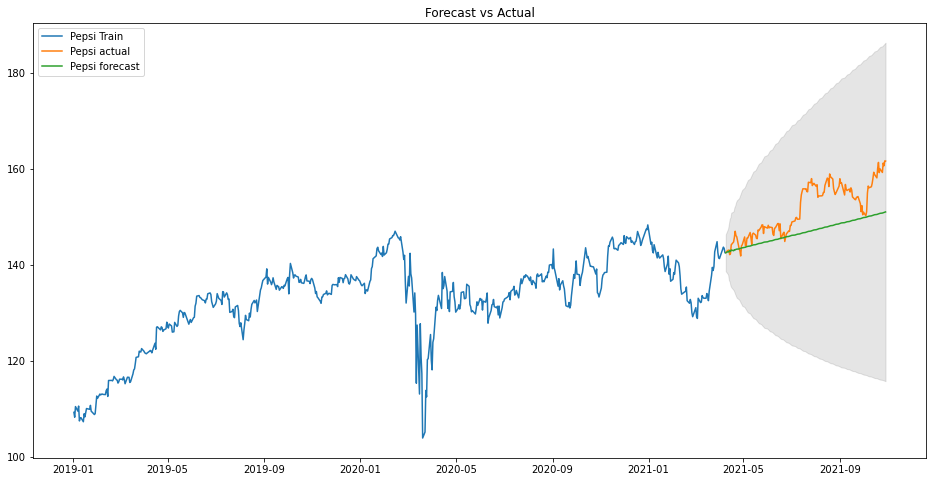

In [325]:
plt.figure(figsize=(16,8))
plt.plot(PEP_train, label='Pepsi Train')
plt.plot(PEP_test[:step],label = 'Pepsi actual')
plt.plot(PEP_fc,label = "Pepsi forecast")
plt.fill_between(PEP_lower.index,PEP_lower,PEP_upper,color = "k", alpha = 0.1)
plt.title("Forecast vs Actual")
plt.legend(loc = "upper left")
plt.show()

## Coca Cola

In [327]:
start='2019-01-01'
end='2021-10-30'

In [328]:
KO = yf.download('KO', start , end)['Close']

[*********************100%***********************]  1 of 1 completed


In [329]:
KO_diff = KO.diff().dropna()
KO_rtn = np.log(KO).diff().dropna()

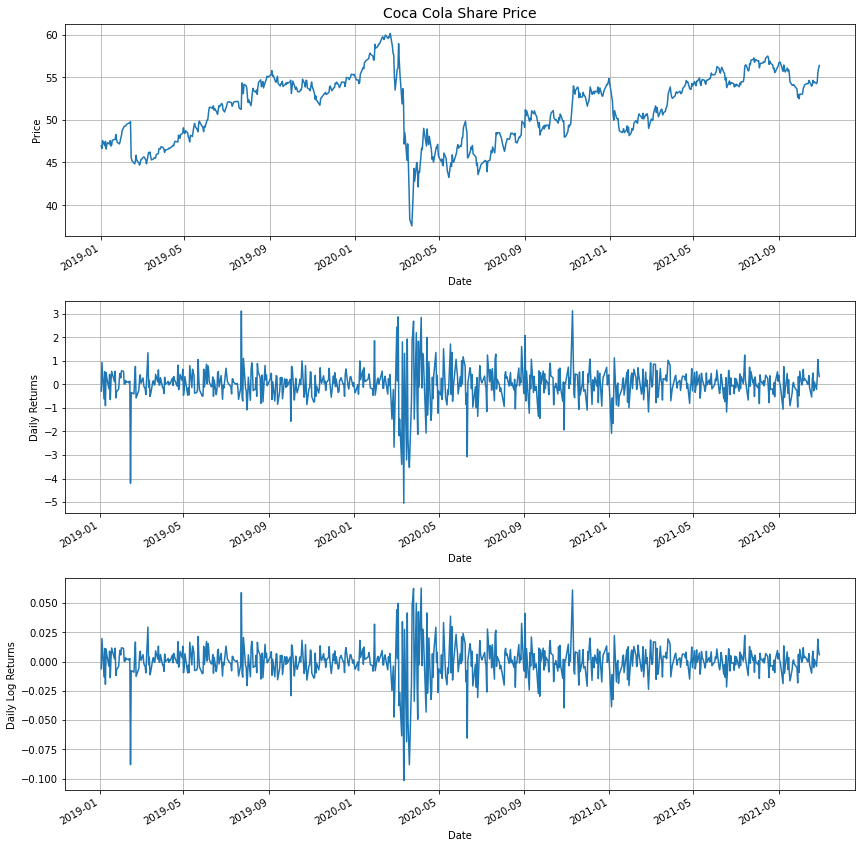

In [330]:
plt.figure(figsize=(12,12))

plt.subplot(3,1, 1)
KO.plot()
plt.grid()
plt.ylabel("Price")
plt.title("Coca Cola Share Price", fontsize = 14)
plt.subplot(3,1, 2)
KO_diff.plot()
plt.grid()
plt.tight_layout(pad=1.5)
plt.ylabel("Daily Returns")
plt.subplot(3,1, 3)
KO_rtn.plot()
plt.grid()
plt.tight_layout(pad=1.5)
plt.ylabel("Daily Log Returns")
plt.savefig("KO_stationary")

In [331]:
result = adfuller(KO)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -2.433054
p-value: 0.132624
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [332]:
result = adfuller(KO_diff)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.005301
p-value: 0.000000
	1%: -3.440
	5%: -2.866
	10%: -2.569


In [333]:
result = adfuller(KO_rtn)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
for key, value in result[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic: -8.258568
p-value: 0.000000
	1%: -3.440
	5%: -2.866
	10%: -2.569


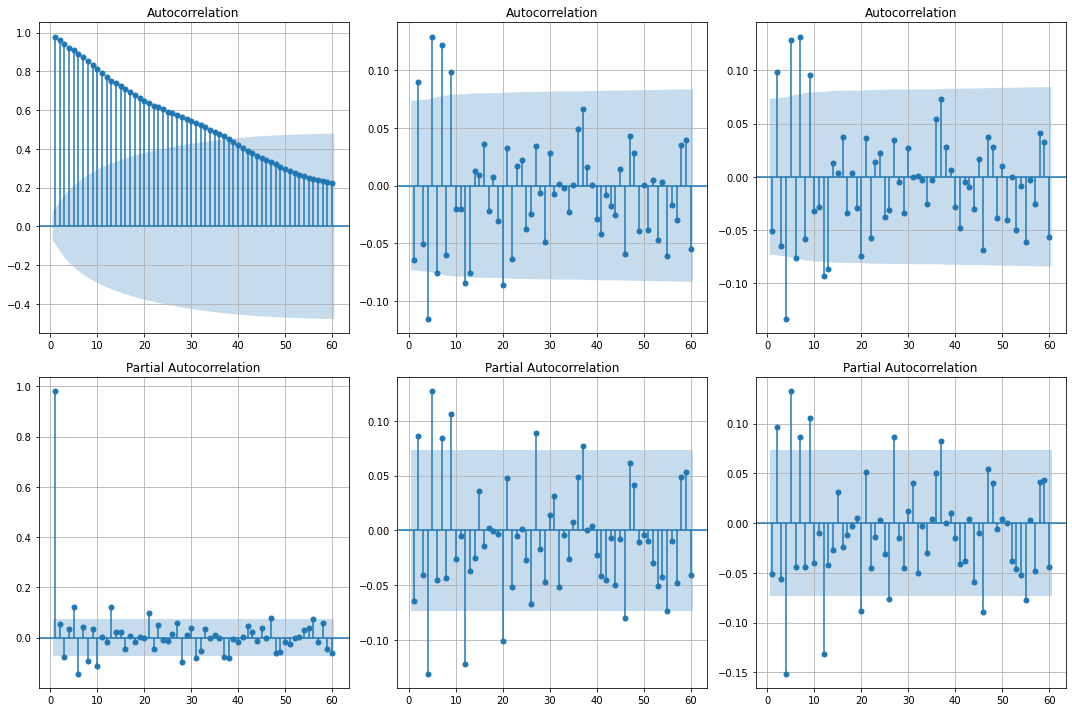

In [334]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2,3,figsize=(15,10))

fig1 = plot_acf(KO,lags=60,zero=False, ax = ax1,use_vlines = True)
ax1.grid()
    
fig2 = plot_acf(KO_diff,lags=60,zero=False, ax = ax2,use_vlines = True)
ax2.grid()
    
fig3 = plot_acf(KO_rtn,lags=60,zero=False, ax = ax3,use_vlines = True)
ax3.grid()
    
fig4 = plot_pacf(KO,lags=60,zero=False, ax = ax4,use_vlines = True)
ax4.grid()
    
fig5 = plot_pacf(KO_diff,lags=60,zero=False, ax = ax5,use_vlines = True)
ax5.grid()
    
fig6 = plot_pacf(KO_rtn,lags=60,zero=False, ax = ax6,use_vlines = True)
ax6.grid()
    
plt.tight_layout()

In [268]:
KO_p = yf.download('KO', start , end)
KO_pr = np.array(KO_p.reset_index()['Close'])
KO_pr_diff = KO_pr[1:] - KO_pr[:-1]

[*********************100%***********************]  1 of 1 completed


In [269]:
n=len(KO_pr_diff)
exog = np.ones(n)
searchARMA(KO_pr_diff, exog, max_p=8, max_q =8)
## choose p and q equal 3 6 or 2 4 or 4 5 or 1 4 or 4 1

p: 0  q: 0  aic: 1618.5093221281238  bic: 1627.6482849689523
p: 0  q: 1  aic: 1617.9522481317094  bic: 1631.6606923929523
p: 0  q: 2  aic: 1613.7020300404538  bic: 1631.979955722111
p: 0  q: 3  aic: 1609.8311071970209  bic: 1632.6785142990923
p: 0  q: 4  aic: 1606.8226701068259  bic: 1634.2395586293117
p: 0  q: 5  aic: 1597.223849348186  bic: 1629.210219291086
p: 0  q: 6  aic: 1595.3018482286298  bic: 1631.857699591944
p: 0  q: 7  aic: 1584.7443270210108  bic: 1625.8696598047395
p: 1  q: 0  aic: 1617.5190931473285  bic: 1631.2275374085714
p: 1  q: 1  aic: 1617.2308928938469  bic: 1635.5088185755042
p: 1  q: 2  aic: 1613.987754971562  bic: 1636.8351620736335
p: 1  q: 3  aic: 1610.435057200579  bic: 1637.8519457230648
p: 1  q: 4  aic: 1576.225185420075  bic: 1608.211555362975
p: 1  q: 5  aic: 1577.6469298654936  bic: 1614.202781228808
p: 1  q: 6  aic: 1579.6430373730147  bic: 1620.7683701567435
p: 1  q: 7  aic: 1578.2334044081235  bic: 1623.9282186122664
p: 2  q: 0  aic: 1614.26028282869

In [335]:
n = int(len(KO)*0.8)
KO_train = KO[:n]
KO_test = KO[n:]

In [336]:
a = [[3,6],[2,4],[4,5],[1,4],[4,1]]

In [337]:
for i in a:
    p = i[0]
    q = i[1]
    KO_model = ARIMA(KO_train, order = (p,1,q))
    KO_result = KO_model.fit()
    step = len(KO_test)
    KO_fc, KO_se, KO_conf = KO_result.forecast(step)
    KO_fc = pd.Series(KO_fc, index=KO_test[:step].index)
    KO_rmse = np.mean((KO_fc - KO_test)**2)**.5
    print(i,KO_rmse)

[3, 6] 1.8668686058414576
[2, 4] 1.718382362294426
[4, 5] 1.9001902444101024
[1, 4] 1.7234994567320843
[4, 1] 1.7411204162802332


In [338]:
KO_model = ARIMA(KO_train, order = (2,1,4))
KO_result = KO_model.fit()

In [339]:
KO_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                  570
Model:                 ARIMA(2, 1, 4)   Log Likelihood                -670.457
Method:                       css-mle   S.D. of innovations              0.784
Date:                Sun, 12 Dec 2021   AIC                           1356.914
Time:                        18:42:50   BIC                           1391.679
Sample:                             1   HQIC                          1370.479
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0107      0.032      0.335      0.738      -0.052       0.073
ar.L1.D.Close    -0.9803      0.307     -3.196      0.001      -1.582      -0.379
ar.L2.D.Close    -0.1884      0.265     -0.712      0.476      -0.707       0.330
ma.L1.D.Close     0.9727      0.305      3.190      0.001       0.375       1.570
ma.L2.D.Close     0.2381      0.266      0.895      0.371      -0.283       0.759
ma.L3.D.Close     0.0409      0.062      0.659      0.510      -0.081       0.162
ma.L4.D.Close    -0.1485      0.066     -2.261      0.024      -0.277      -0.020
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -1.3932           +0.0000j            1.3932            0.5000
AR.2           -3.8096           +0.0000j            3.8096            0.5000
MA.1           -1.0603           -0.0000j            1.0603           -0.5000
MA.2           -0.5627           -1.5049j            1.6067           -0.3069
MA.3           -0.5627           +1.5049j            1.6067            0.3069
MA.4            2.4608           -0.0000j            2.4608           -0.0000
-----------------------------------------------------------------------------
"""

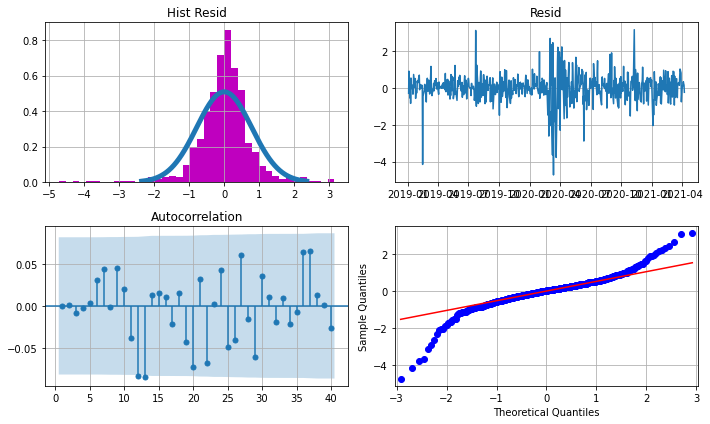

In [340]:
resid = KO_result.resid
plot_diagnosticsTight3(resid)

In [299]:
KO_fc, KO_se, KO_conf = KO_result.forecast(step)

In [300]:
KO_fc = pd.Series(KO_fc, index=KO_test[:step].index)
KO_lower = pd.Series (KO_conf[:, 0], index=KO_test[:step].index)
KO_upper = pd.Series (KO_conf[:, 1], index=KO_test[:step].index)

In [301]:
KO_rmse = np.mean((KO_fc - KO_test)**2)**.5
KO_rmse

1.718382362294426

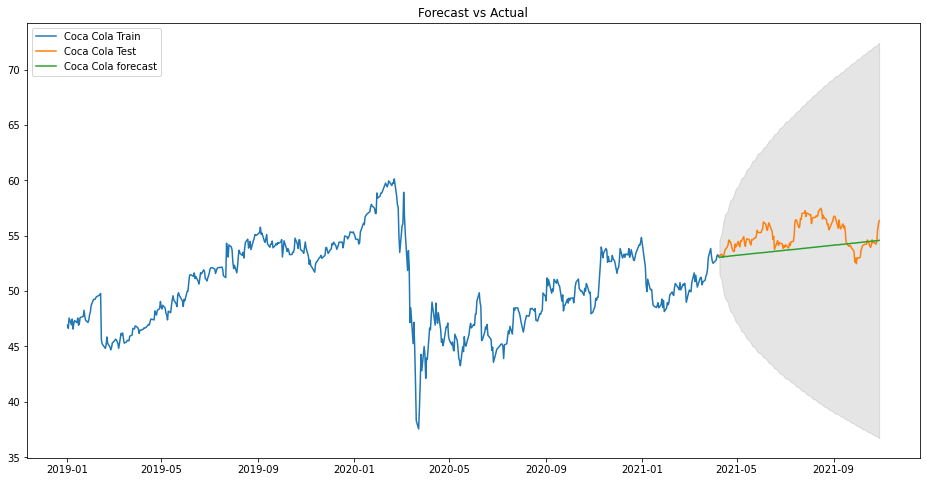

In [302]:
plt.figure(figsize=(16,8))
plt.plot(KO_train, label='Coca Cola Train')
plt.plot(KO_test[:step],label = 'Coca Cola Test')
plt.plot(KO_fc,label = "Coca Cola forecast")
plt.fill_between(KO_lower.index,KO_lower,KO_upper,color = "k", alpha = 0.1)
plt.title("Forecast vs Actual")
plt.legend(loc = "upper left")
plt.show()

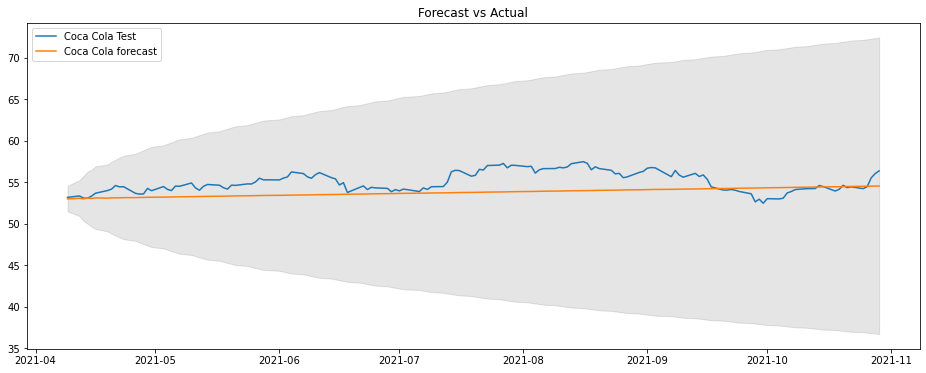

In [443]:
plt.figure(figsize=(16,6))
plt.plot(KO_test[:step],label = 'Coca Cola Test')
plt.plot(KO_fc,label = "Coca Cola forecast")
plt.fill_between(KO_lower.index,KO_lower,KO_upper,color = "k", alpha = 0.1)
plt.title("Forecast vs Actual")
plt.legend(loc = "upper left")
plt.show()

# LSTM Model

In [342]:
PEP = yf.download('PEP',  start, end)
KO = yf.download('KO',  start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


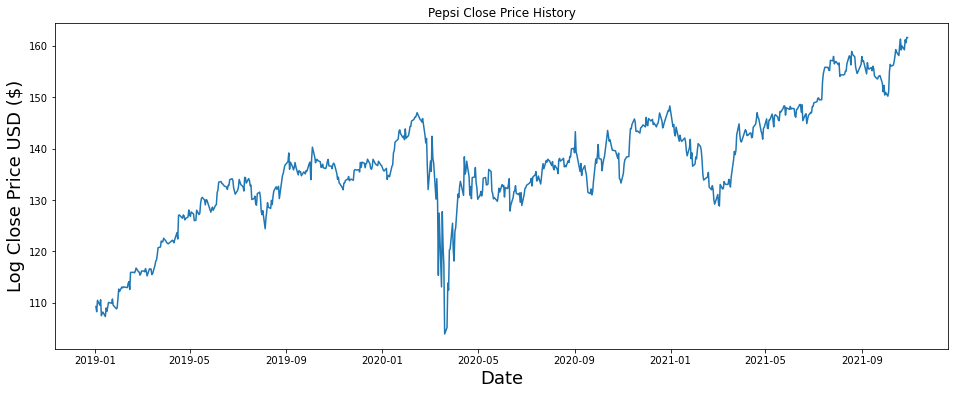

In [343]:
plt.figure(figsize=(16,6))
plt.title('Pepsi Close Price History')
plt.plot(PEP['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Log Close Price USD ($)', fontsize=18)
plt.show()

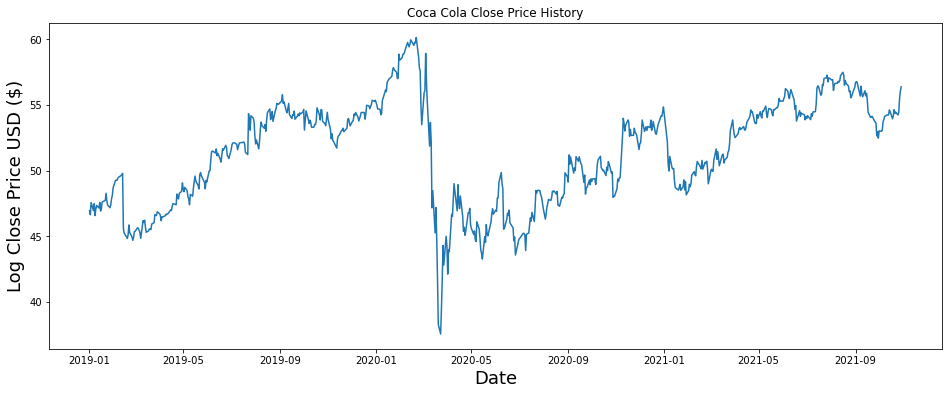

In [344]:
plt.figure(figsize=(16,6))
plt.title('Coca Cola Close Price History')
plt.plot(KO['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Log Close Price USD ($)', fontsize=18)
plt.show()

## Pepsi

In [427]:
# Create a new dataframe with only the 'Close column 
PEP_data = PEP.filter(['Close'])
# Convert the dataframe to a numpy array
PEP_dataset = PEP_data.values

# Get the number of rows to train the model on
PEP_training_data_len = int(np.ceil( len(PEP_dataset) * .80 ))

PEP_training_data_len

572

In [428]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
PEP_scaled_data = scaler.fit_transform(PEP_dataset)

In [429]:
# Create the training data set 
# Create the scaled training data set
PEP_train_data = PEP_scaled_data[0:int(PEP_training_data_len), :]
# Split the data into x_train and y_train data sets
PEP_x_train = []
PEP_y_train = []

for i in range(60, len(PEP_train_data)):
    PEP_x_train.append(PEP_train_data[i-60:i, 0])
    PEP_y_train.append(PEP_train_data[i, 0])
    if i<= 61:
        print(PEP_x_train)
        print(PEP_y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
PEP_x_train, PEP_y_train = np.array(PEP_x_train), np.array(PEP_y_train)

# Reshape the data
PEP_x_train = np.reshape(PEP_x_train, (PEP_x_train.shape[0], PEP_x_train.shape[1], 1))
# x_train.shape

[array([0.09273702, 0.07505637, 0.11353794, 0.09707053, 0.11527131,
       0.0617091 , 0.07314962, 0.073323  , 0.05876235, 0.08771014,
       0.076443  , 0.09169703, 0.10643092, 0.10365755, 0.11787145,
       0.09655053, 0.0939504 , 0.08476339, 0.08788352, 0.11943144,
       0.15149937, 0.14317911, 0.15877963, 0.15548625, 0.15808639,
       0.15877963, 0.15747963, 0.15669963, 0.17091353, 0.17663379,
       0.15011262, 0.20766172, 0.20800834, 0.20627496, 0.21095509,
       0.22239561, 0.21026172, 0.20870172, 0.19830133, 0.20298145,
       0.21234185, 0.21216847, 0.20974172, 0.22066224, 0.21095509,
       0.19587457, 0.21944873, 0.21910211, 0.21927548, 0.2005547 ,
       0.20332821, 0.23123587, 0.24544977, 0.24943666, 0.26885082,
       0.29103835, 0.29329173, 0.31357251, 0.31131913, 0.31045238])]
[0.3227596536844397]

[array([0.09273702, 0.07505637, 0.11353794, 0.09707053, 0.11527131,
       0.0617091 , 0.07314962, 0.073323  , 0.05876235, 0.08771014,
       0.076443  , 0.09169703, 0.106

In [430]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (PEP_x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(PEP_x_train, PEP_y_train, batch_size=64, epochs=50,verbose = 1)

Epoch 1/50
8/8 [==============================] - 3s 56ms/step - loss: 0.0716
Epoch 2/50
8/8 [==============================] - 0s 58ms/step - loss: 0.0123
Epoch 3/50
8/8 [==============================] - 0s 58ms/step - loss: 0.0068
Epoch 4/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0049
Epoch 5/50
8/8 [==============================] - 0s 54ms/step - loss: 0.0044
Epoch 6/50
8/8 [==============================] - 0s 55ms/step - loss: 0.0043
Epoch 7/50
8/8 [==============================] - 0s 56ms/step - loss: 0.0042
Epoch 8/50
8/8 [==============================] - 0s 56ms/step - loss: 0.0040
Epoch 9/50
8/8 [==============================] - 0s 56ms/step - loss: 0.0039
Epoch 10/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0038
Epoch 11/50
8/8 [==============================] - 1s 62ms/step - loss: 0.0037
Epoch 12/50
8/8 [==============================] - 0s 62ms/step - loss: 0.0036
Epoch 13/50
8/8 [==============================] - 0s 61ms/st

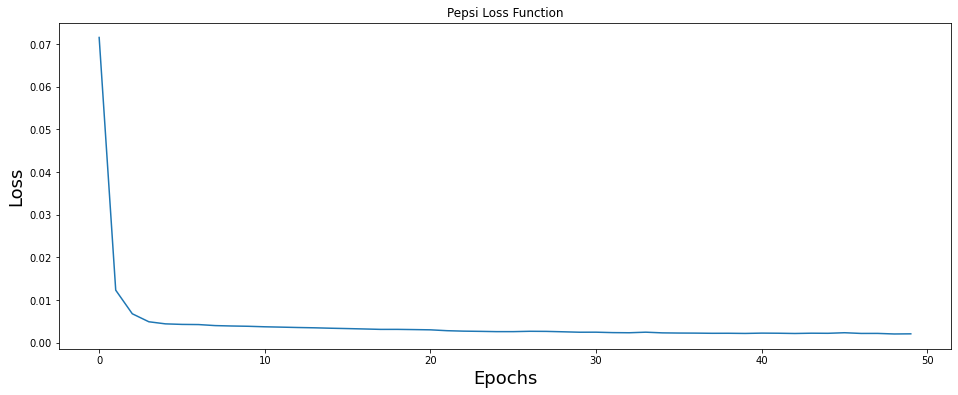

In [431]:
plt.figure(figsize=(16,6))
plt.title('Pepsi Loss Function')
plt.plot(history.history['loss'])
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

In [432]:
predictions = model.predict(PEP_x_train)

In [433]:
predictions = scaler.inverse_transform(predictions)

In [434]:
PEP_y_train_new = np.reshape(PEP_y_train, (PEP_y_train.size, 1))

In [435]:
PEP_y_train_new = scaler.inverse_transform(PEP_y_train_new)

In [436]:
# Get the root mean squared error (RMSE) of train dataset
train_rmse = np.sqrt(np.mean(((predictions - PEP_y_train_new) ** 2)))
train_rmse

2.6633383767477996

In [437]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
PEP_test_data = PEP_scaled_data[PEP_training_data_len - 60: , :]
# Create the data sets x_test and y_test
PEP_x_test = []
PEP_y_test = PEP_dataset[PEP_training_data_len:, :]
for i in range(60, len(PEP_test_data)):
    PEP_x_test.append(PEP_test_data[i-60:i, 0])
    
# Convert the data to a numpy array
PEP_x_test = np.array(PEP_x_test)

# Reshape the data
PEP_x_test = np.reshape(PEP_x_test, (PEP_x_test.shape[0], PEP_x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(PEP_x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
test_rmse_plot = ((predictions - PEP_y_test) ** 2)
test_rmse = np.sqrt(np.mean(((predictions - PEP_y_test) ** 2)))
test_rmse

1.7205950100768215

In [438]:
train = PEP_data[:PEP_training_data_len]
PEP_valid = PEP_data[PEP_training_data_len:]
PEP_valid['Predictions'] = predictions

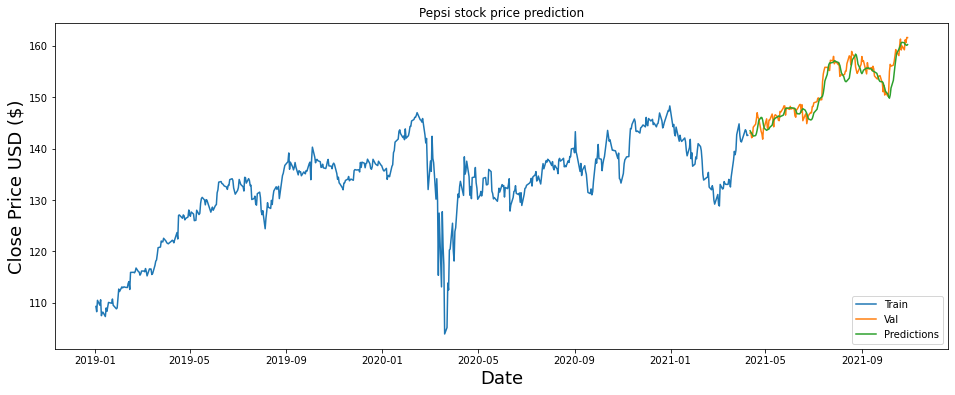

In [439]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Pepsi stock price prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'][:805])
plt.plot(PEP_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

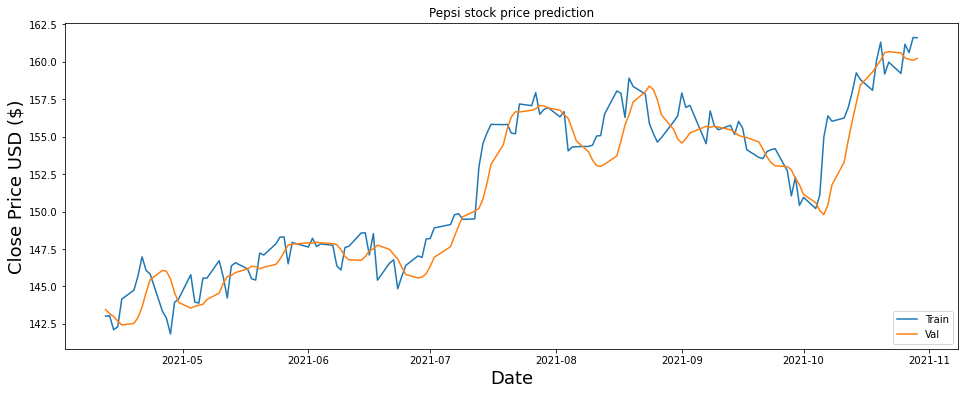

In [441]:
plt.figure(figsize=(16,6))
plt.title('Pepsi stock price prediction')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(PEP_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

## Coca Cola

In [445]:
# Create a new dataframe with only the 'Close column 
KO_data = KO.filter(['Close'])
# Convert the dataframe to a numpy array
KO_dataset = KO_data.values

# Get the number of rows to train the model on
KO_training_data_len = int(np.ceil( len(KO_dataset) * .80 ))

KO_training_data_len

572

In [446]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
KO_scaled_data = scaler.fit_transform(KO_dataset)

In [447]:
# Create the training data set 
# Create the scaled training data set
KO_train_data = KO_scaled_data[0:int(KO_training_data_len), :]
# Split the data into x_train and y_train data sets
KO_x_train = []
KO_y_train = []

for i in range(60, len(KO_train_data)):
    KO_x_train.append(KO_train_data[i-60:i, 0])
    KO_y_train.append(KO_train_data[i, 0])
    if i<= 61:
        print(KO_x_train)
        print(KO_y_train)
        print()
        
# Convert the x_train and y_train to numpy arrays 
KO_x_train, KO_y_train = np.array(KO_x_train), np.array(KO_y_train)

# Reshape the data
KO_x_train = np.reshape(KO_x_train, (KO_x_train.shape[0], KO_x_train.shape[1], 1))
# x_train.shape

[array([0.41515282, 0.40230386, 0.44350901, 0.41603897, 0.43952141,
       0.39920241, 0.42135571, 0.43331852, 0.42490032, 0.44350901,
       0.41470966, 0.42091272, 0.44528132, 0.45015507, 0.47452367,
       0.44882576, 0.43464766, 0.42578631, 0.43597697, 0.45635797,
       0.46832077, 0.49357552, 0.51794412, 0.51838711, 0.51838711,
       0.52547616, 0.52902077, 0.53389452, 0.53610982, 0.54186973,
       0.35578196, 0.34027472, 0.32210902, 0.33407165, 0.36774477,
       0.34204685, 0.3269826 , 0.31590595, 0.3269826 , 0.34470531,
       0.34647762, 0.35844042, 0.35622495, 0.34957906, 0.34204685,
       0.32255201, 0.38192286, 0.37616296, 0.38369517, 0.36065572,
       0.34293301, 0.34780676, 0.35445282, 0.35312351, 0.35223735,
       0.37084621, 0.37527681, 0.40230386, 0.40097472, 0.39964557])]
[0.4120513674261692]

[array([0.41515282, 0.40230386, 0.44350901, 0.41603897, 0.43952141,
       0.39920241, 0.42135571, 0.43331852, 0.42490032, 0.44350901,
       0.41470966, 0.42091272, 0.445

In [448]:
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (KO_x_train.shape[1], 1)))
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(KO_x_train, KO_y_train, batch_size=64, epochs=50,verbose = 1)

Epoch 1/50
8/8 [==============================] - 3s 56ms/step - loss: 0.1127
Epoch 2/50
8/8 [==============================] - 0s 60ms/step - loss: 0.0192
Epoch 3/50
8/8 [==============================] - 0s 60ms/step - loss: 0.0115
Epoch 4/50
8/8 [==============================] - 0s 56ms/step - loss: 0.0083
Epoch 5/50
8/8 [==============================] - 0s 54ms/step - loss: 0.0073
Epoch 6/50
8/8 [==============================] - 0s 53ms/step - loss: 0.0067
Epoch 7/50
8/8 [==============================] - 0s 54ms/step - loss: 0.0063
Epoch 8/50
8/8 [==============================] - 0s 57ms/step - loss: 0.0058
Epoch 9/50
8/8 [==============================] - 0s 52ms/step - loss: 0.0055
Epoch 10/50
8/8 [==============================] - 0s 52ms/step - loss: 0.0053
Epoch 11/50
8/8 [==============================] - 0s 54ms/step - loss: 0.0050
Epoch 12/50
8/8 [==============================] - 0s 60ms/step - loss: 0.0052
Epoch 13/50
8/8 [==============================] - 0s 57ms/st

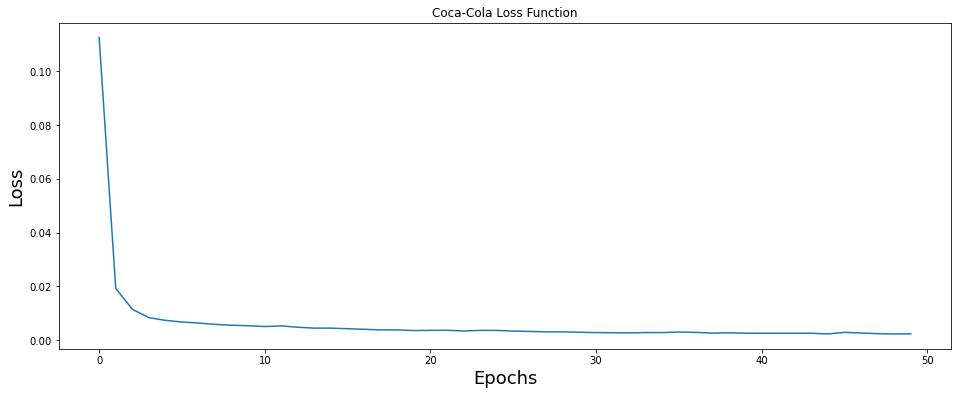

In [449]:
plt.figure(figsize=(16,6))
plt.title('Coca-Cola Loss Function')
plt.plot(history.history['loss'])
plt.xlabel('Epochs', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

In [450]:
predictions = model.predict(KO_x_train)

In [451]:
predictions = scaler.inverse_transform(predictions)

In [452]:
KO_y_train_new = np.reshape(KO_y_train, (KO_y_train.size, 1))

In [453]:
KO_y_train_new = scaler.inverse_transform(KO_y_train_new)

In [454]:
# Get the root mean squared error (RMSE) of train dataset
KO_train_rmse = np.sqrt(np.mean(((predictions - KO_y_train_new) ** 2)))
KO_train_rmse

1.0508170125504048

In [455]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002 
KO_test_data = KO_scaled_data[KO_training_data_len - 60: , :]
# Create the data sets x_test and y_test
KO_x_test = []
KO_y_test = KO_dataset[KO_training_data_len:, :]
for i in range(60, len(KO_test_data)):
    KO_x_test.append(KO_test_data[i-60:i, 0])
    
# Convert the data to a numpy array
KO_x_test = np.array(KO_x_test)

# Reshape the data
KO_x_test = np.reshape(KO_x_test, (KO_x_test.shape[0], KO_x_test.shape[1], 1 ))

# Get the models predicted price values 
predictions = model.predict(KO_x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - KO_y_test) ** 2)))
rmse

0.8864038395272292

In [456]:
train = KO_data[:KO_training_data_len]
KO_valid = KO_data[KO_training_data_len:]
KO_valid['Predictions'] = predictions

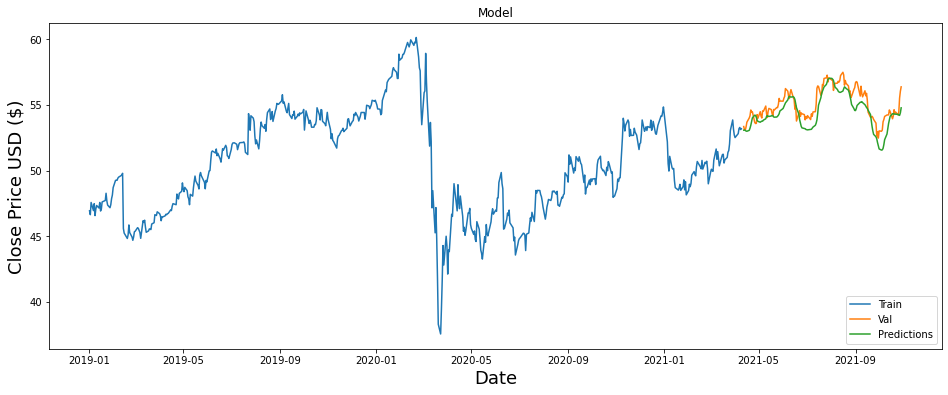

In [457]:
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'][:805])
plt.plot(KO_valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

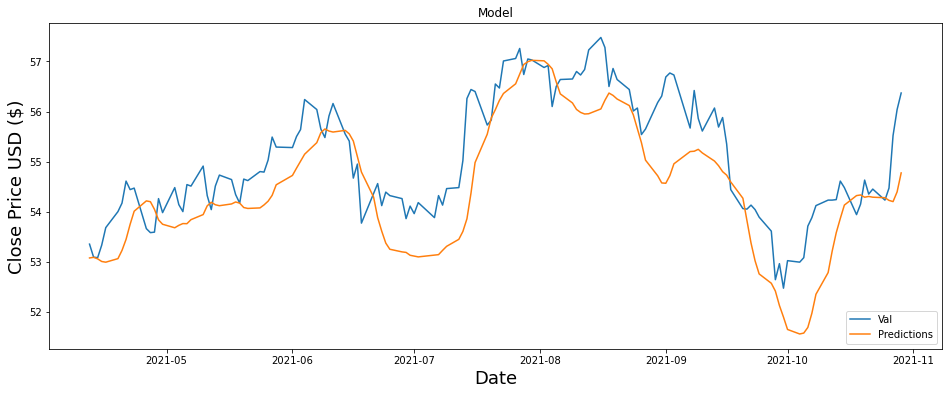

In [458]:
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(KO_valid[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

# Compare between ARIMA and LSTM

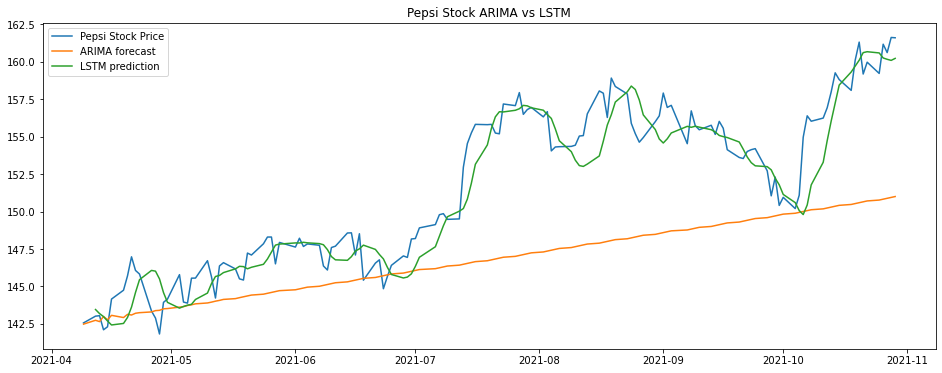

In [463]:
plt.figure(figsize=(16,6))
plt.plot(PEP_test[:step],label = 'Pepsi Stock Price')
plt.plot(PEP_fc,label = "ARIMA forecast")
plt.plot(PEP_valid[['Predictions']], label = 'LSTM prediction')
plt.title("Pepsi Stock ARIMA vs LSTM")
plt.legend(loc = "upper left")
plt.show()

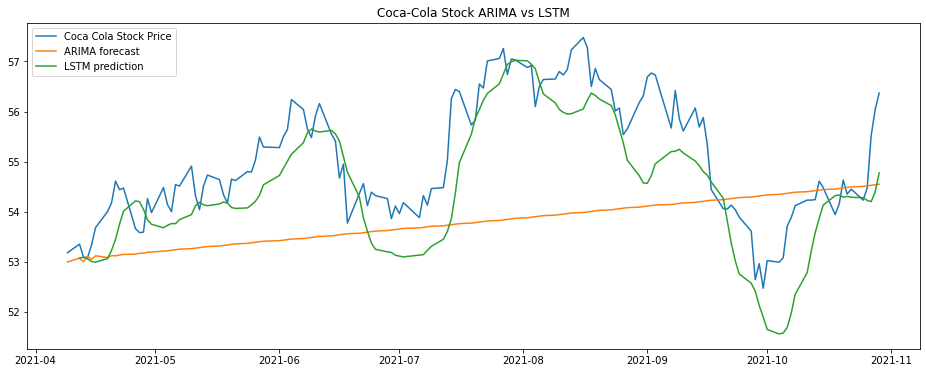

In [462]:
plt.figure(figsize=(16,6))
plt.plot(KO_test[:step],label = 'Coca Cola Stock Price')
plt.plot(KO_fc,label = "ARIMA forecast")
plt.plot(KO_valid[['Predictions']], label = 'LSTM prediction')
plt.title("Coca-Cola Stock ARIMA vs LSTM")
plt.legend(loc = "upper left")
plt.show()